In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import networkx as nx
import random
import pickle
import itertools
import urllib.request as urllib
import io
import zipfile

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow.linalg import diag
from func_timeout import func_timeout, FunctionTimedOut
from tensorflow.keras import callbacks
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score
from networkx.generators.community import LFR_benchmark_graph
from itertools import count

from helpers import *
from Autoencoder import *

In [2]:
#KARATE CLUB
kc = pickle.load(open("kc.p", "rb"))

X_kc_1 = tf.convert_to_tensor(nx.modularity_matrix(kc))

ae_kc_1 = Autoencoder(34, 32)
ae_kc_1.compile(optimizer='adam', loss="mse")
history_kc_1 = ae_kc_1.fit(X_kc_1, X_kc_1, epochs=1000, shuffle=True, batch_size=34, verbose=0)

X_kc_2 = ae_kc_1.encoder(X_kc_1)

ae_kc_2 = Autoencoder(32, 16)
ae_kc_2.compile(optimizer='adam', loss="mse")
history_kc_2 = ae_kc_2.fit(X_kc_2, X_kc_2, epochs=2000, shuffle=True, batch_size=32, verbose=0)

ae_kc_1.save("ae_kc_1")
ae_kc_2.save("ae_kc_2")

INFO:tensorflow:Assets written to: ae_kc_1\assets
INFO:tensorflow:Assets written to: ae_kc_2\assets


In [3]:
H_kc_2 = ae_kc_2.encoder(X_kc_2)
kmeans = KMeans(n_clusters=2, random_state=0).fit(H_kc_2)
labels = karate_club_communities(kc)

In [4]:
normalized_mutual_info_score(labels, kmeans.labels_)

0.8371694628777809

In [5]:
#LFR with mu=0.1
lfr1 = pickle.load(open("lfr_1.p", "rb"))

In [69]:
X_lfr1_1 = tf.convert_to_tensor(nx.modularity_matrix(lfr1))

ae_lfr1_1 = Autoencoder(1000, 512)
ae_lfr1_1.compile(optimizer='adam', loss="mse")
lfr1_history_1 = ae_lfr1_1.fit(X_lfr1_1, X_lfr1_1, epochs=100, shuffle=True, batch_size=1000, verbose=0)

X_lfr1_2 = ae_lfr1_1.encoder(X_lfr1_1)

ae_lfr1_2 = Autoencoder(512, 256)
ae_lfr1_2.compile(optimizer='adam', loss="mse")
lfr1_history_2 = ae_lfr1_2.fit(X_lfr1_2, X_lfr1_2, epochs=100, shuffle=True, batch_size=512, verbose=0)

X_lfr1_3 = ae_lfr1_2.encoder(X_lfr1_2)

ae_lfr1_3 = Autoencoder(256, 128)
ae_lfr1_3.compile(optimizer='adam', loss="mse")
lfr1_history_3 = ae_lfr1_3.fit(X_lfr1_3, X_lfr1_3, epochs=100, shuffle=True, batch_size=256, verbose=0)

In [70]:
H_lfr1 = ae_lfr1_3.encoder(X_lfr1_3)
lfr1_labels = get_community_labels(lfr1, 'community')
kmeans_lfr1 = KMeans(n_clusters=get_num_communities(lfr1, 'community'), random_state=0).fit(H_lfr1)

In [71]:
normalized_mutual_info_score(lfr1_labels, kmeans_lfr1.labels_)

1.0

In [11]:
#LFR with mu=0.3
lfr2 = pickle.load(open("lfr_2.p", "rb"))

In [66]:
X_lfr2_1 = tf.convert_to_tensor(nx.modularity_matrix(lfr2))

ae_lfr2_1 = Autoencoder(1000, 512)
ae_lfr2_1.compile(optimizer='adam', loss="mse")
lfr2_history_1 = ae_lfr2_1.fit(X_lfr2_1, X_lfr2_1, epochs=100, shuffle=True, batch_size=1000, verbose=0)

X_lfr2_2 = ae_lfr2_1.encoder(X_lfr2_1)

ae_lfr2_2 = Autoencoder(512, 256)
ae_lfr2_2.compile(optimizer='adam', loss="mse")
lfr2_history_2 = ae_lfr2_2.fit(X_lfr2_2, X_lfr2_2, epochs=100, shuffle=True, batch_size=512, verbose=0)

X_lfr2_3 = ae_lfr2_2.encoder(X_lfr2_2)

ae_lfr2_3 = Autoencoder(256, 128)
ae_lfr2_3.compile(optimizer='adam', loss="mse")
lfr2_history_3 = ae_lfr2_3.fit(X_lfr2_3, X_lfr2_3, epochs=100, shuffle=True, batch_size=256, verbose=0)

In [67]:
H_lfr2 = ae_lfr2_3.encoder(X_lfr2_3)
lfr2_labels = get_community_labels(lfr2, 'community')
kmeans_lfr2 = KMeans(n_clusters=get_num_communities(lfr2, 'community'), random_state=0).fit(H_lfr2)

In [68]:
normalized_mutual_info_score(lfr2_labels, kmeans_lfr2.labels_)

0.8972843510106884

In [91]:
#LFR with mu=0.5
lfr3 = pickle.load(open("lfr_3.p", "rb"))

In [104]:
X_lfr3_1 = tf.convert_to_tensor(nx.modularity_matrix(lfr3))

ae_lfr3_1 = Autoencoder(1000, 512)
ae_lfr3_1.compile(optimizer='adam', loss="mse")
lfr3_history_1 = ae_lfr3_1.fit(X_lfr3_1, X_lfr3_1, epochs=100, shuffle=True, batch_size=1000, verbose=0)

X_lfr3_2 = ae_lfr3_1.encoder(X_lfr3_1)

ae_lfr3_2 = Autoencoder(512, 256)
ae_lfr3_2.compile(optimizer='adam', loss="mse")
lfr3_history_2 = ae_lfr3_2.fit(X_lfr3_2, X_lfr3_2, epochs=100, shuffle=True, batch_size=512, verbose=0)

X_lfr3_3 = ae_lfr3_2.encoder(X_lfr3_2)

ae_lfr3_3 = Autoencoder(256, 128)
ae_lfr3_3.compile(optimizer='adam', loss="mse")
lfr3_history_3 = ae_lfr3_3.fit(X_lfr3_3, X_lfr3_3, epochs=100, shuffle=True, batch_size=256, verbose=0)

X_lfr3_4 = ae_lfr3_3.encoder(X_lfr3_3)

ae_lfr3_4 = Autoencoder(128, 64)
ae_lfr3_4.compile(optimizer='adam', loss="mse")
lfr3_history_3 = ae_lfr3_4.fit(X_lfr3_4, X_lfr3_4, epochs=100, shuffle=True, batch_size=128, verbose=0)

In [105]:
H_lfr3 = ae_lfr3_4.encoder(X_lfr3_4)
lfr3_labels = get_community_labels(lfr3, 'community')
kmeans_lfr3 = KMeans(n_clusters=get_num_communities(lfr3, 'community'), random_state=0).fit(H_lfr3)

In [106]:
normalized_mutual_info_score(lfr3_labels, kmeans_lfr3.labels_)

0.08553510514435994

In [107]:
#FOOTBALL
football = pickle.load(open("football.p", "rb"))

In [108]:
#Network structure: 115-64-32-16

X_football_1 = tf.convert_to_tensor(nx.modularity_matrix(football))

ae_football_1 = Autoencoder(115, 64)
ae_football_1.compile(optimizer='adam', loss="mse")
football_history_1 = ae_football_1.fit(X_football_1, X_football_1, epochs=500, shuffle=True, batch_size=115, verbose=0)

X_football_2 = ae_football_1.encoder(X_football_1)

ae_football_2 = Autoencoder(64, 32)
ae_football_2.compile(optimizer='adam', loss="mse")
football_history_2 = ae_football_2.fit(X_football_2, X_football_2, epochs=500, shuffle=True, batch_size=64, verbose=0)

X_football_3 = ae_football_2.encoder(X_football_2)

ae_football_3 = Autoencoder(32, 16)
ae_football_3.compile(optimizer='adam', loss="mse")
football_history_3 = ae_football_3.fit(X_football_3, X_football_3, epochs=500, shuffle=True, batch_size=32, verbose=0)

In [109]:
H_football = ae_football_3.encoder(X_football_3)
football_labels = [football.nodes[v]['value'] for v in football]
kmeans_football = KMeans(n_clusters=12, random_state=0).fit(H_football)

In [110]:
normalized_mutual_info_score(football_labels, kmeans_football.labels_)

0.9224880906948844

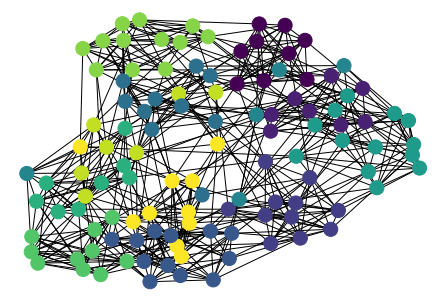

In [111]:
nx.draw(football, node_size=200, node_color=football_labels)

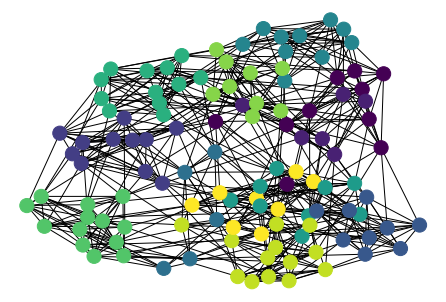

In [112]:
nx.draw(football, node_size=200, node_color=kmeans_football.labels_)